# Latent Dirichlet Allocation (LDA): An Ilustrative Example

- author: Tao Wang
- I refer to following online resources:
  - [Topic Modeling in Python: Latent Dirichlet Allocation (LDA)](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjKnJr92s3zAhUhpnIEHQ7iBicQFnoECA4QAQ&url=https%3A%2F%2Ftowardsdatascience.com%2Fend-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0&usg=AOvVaw3BOumfnMly0lUh3pfEHrWd)
  -[Topic Modeling with Gensim (Python) - Machine Learning Plus](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjKnJr92s3zAhUhpnIEHQ7iBicQFnoECAIQAQ&url=https%3A%2F%2Fwww.machinelearningplus.com%2Fnlp%2Ftopic-modeling-gensim-python%2F&usg=AOvVaw09WN-93Y-Jk0fbq3KWF7qF)
  - [Topic modeling visualization – How to present the results of LDA models?](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)
  

## Data importing

In [1]:
import pandas as pd

In [2]:
## Here, we use a sub-sample of NYT articles containing key words "inflation" as an example 
## it is saved as a pickle file (a handy and light-weighted data format in python) 
## the path and name

file_name = '../../InfNLPProject/WorkingFolder/Python/article_data.pkl'

article_data = pd.read_pickle(file_name)

In [3]:
## an example of the article 
## the second article in the database and the first 1000 words in the article
## only print part of the article to save the space 
article_data.iloc[2]['text'][:1000]

" WASHINGTON -- President Trump, who has spent months assailing the Federal Reserve for its interest rate policies, said he planned to nominate Christopher Waller, a longtime regional Fed official, and Judy Shelton, a Fed critic, to serve on the central bank's seven-member board.\nThe president announced his intentions on Tuesday evening in a series of tweets. Mr. Waller, the executive vice president at the Federal Reserve Bank of St. Louis, is a far more conventional pick than Mr. Trump's earlier Fed choices of Herman Cain and Stephen Moore.\nMr. Cain, a former presidential candidate, and Mr. Moore, a conservative economist, were outspoken pundits with strong political views. Both men -- whose past actions and views toward women elicited strong criticism -- withdrew from consideration after congressional opposition made it clear that neither would win Senate confirmation.\nMs. Shelton is a former Trump campaign adviser and transition team member who has been an outspoken advocate for 

## Text Preprocessing 

We will perform the following steps:

- __Tokenization__: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 2 characters are removed.
- All __stopwords__ are removed.
- Words are __lemmatized__ — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are __stemmed__ — words are reduced to their root form.

In [4]:
## I did not have gensim package installed. 
## so the following code is used to install it
## comment it out once it is run once 
#pip install gensim

In [5]:
import re
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
#import nltk.stem as stemmer
import numpy as np
import nltk
import matplotlib.pyplot as plt
#nltk.download('wordnet')

In [6]:
from wordcloud import WordCloud

## stemming and lemmatizing

- Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 
- Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [7]:
## write a function to lemmatize and stem the words 

def remove_email(text):
    return [re.sub('\S*@\S*\s?', '', email) for email in text]

def lemmatize_stemming(word):
    stemmer = SnowballStemmer("english")
    return WordNetLemmatizer().lemmatize(stemmer.stem(word))

## also remove stop words
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>=2:
            result.append(lemmatize_stemming(token))  
    return result

In [8]:
## apply above functions to an example article 

random_article = np.random.randint(0,1000)

one_article = article_data.iloc[random_article]['text']

print('original document: ')
print(one_article)

print('splitted into words: ')
one_artile = remove_email(one_article)
tokens = gensim.utils.simple_preprocess(one_article)
#words = []
#for word in one_article.split():
#    words.append(word)
print(tokens[:100])
print('\n\n tokenized and lemmatized document: ')
words_processed = preprocess(one_article)
print(words_processed[:200])

original document: 
 It seems that last year's $1.5 trillion tax-cut package, despite heavily favoring affluent investors and corporate titans over workers of modest means, was insufficiently generous to the wealthy to satisfy certain members of the Trump administration. So now Treasury Secretary Steven Mnuchin offers an exciting plan to award an additional $100 billion tax cut to the richest Americans.
Specifically, Mr. Mnuchin has directed his department to explore allowing investors to take inflation into account when calculating their capital gains tax bill. (Instead of determining how much value a stock had gained by subtracting its selling price from its original purchase price, investors would first adjust the purchase price to reflect what it would be in inflation-adjusted dollars.) Fans of the move argue that it would benefit the wide swath of middle-class Americans who own stocks, along with all those older Americans whose homes have appreciated in value over the decades. And

### Generate a wordcloud for an example article

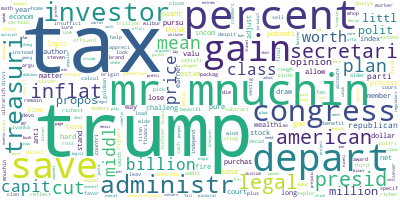

In [9]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", 
                      max_words=500, 
                      contour_width=3, 
                      contour_color='steelblue')
# Generate a word cloud
long_string=(" ").join(words_processed)  
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
## process all articles

all_tokens = {}  # empty dictionary to save
id_map = {} ## map the id in the dataset to the id in the matrix (some articles are empty)

id_count = -1  
for i in range(len(article_data)):
    #print(i)
    this_article = article_data['text'].iloc[i]
    if type(this_article)==str:
        #print('article '+str(i) + ' works')
        processed_docs = preprocess(this_article)
        all_tokens[i] = processed_docs
        #print(processed_docs[:10])
        id_count+=1
        id_map[i]=id_count 
        #print(id_count)

all_tokens_list = [all_tokens[i] for i in all_tokens.keys()]

In [11]:
print('Here are an example of the preprocessed words from a particular article')

print(all_tokens_list[10])

Here are an example of the preprocessed words from a particular article
['tehran', 'tehran', 'beat', 'motorcycl', 'cheap', 'fast', 'break', 'law', 'gridlock', 'traffic', 'motorcycl', 'pul', 'citi', 'million', 'nuisanc', 'necessari', 'tri', 'cultiv', 'special', 'relationship', 'motorcycl', 'mechan', 'tehran', 'talk', 'listen', 'farzad', 'motorcycl', 'mechan', 'work', 'hole', 'wall', 'garag', 'neighborhood', 'complain', 'price', 'engin', 'oil', 'tripl', 'late', 'custom', 'think', 'rip', 'said', 'tell', 'bazaar', 'buy', 'oil', 'want', 'll', 'chang', 'visit', 'erbil', 'iraqi', 'kurdistan', 'bought', 'pair', 'hike', 'shoe', 'eye', 'shone', 'gave', 'shoe', 'pair', 'bought', 'iran', 'cost', 'equival', 'month', 'wage', 'labor', 'thursday', 'morn', 'iran', 'shot', 'american', 'surveil', 'drone', 'american', 'claim', 'drone', 'intern', 'airspac', 'iranian', 'releas', 'compet', 'coordin', 'place', 'iranian', 'territori', 'thursday', 'night', 'presid', 'trump', 'approv', 'retaliatori', 'strike', '

## Bag of Words on the Dataset

Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.


In [12]:
from gensim.models import Phrases
bigram = Phrases(all_tokens_list, min_count=20)

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
for idx in range(len(all_tokens_list)):
    for token in bigram[all_tokens_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            all_tokens_list[idx].append(token)

In [13]:
## get the dictionary over all articles

dictionary = gensim.corpora.Dictionary(all_tokens_list)

## filter extreme values 
nb_doc = len(all_tokens_list)

no_below =int(0.001*nb_doc)
dictionary.filter_extremes(no_below=no_below)

In [14]:
## print some words from the dictionary 



print('The length of the dictionary: '+str(len(dictionary)))
print('Here are some words from the dictionary:')
count = 0
for x in dictionary.values():
    count=count + 1
    if count <=20:
        print(x)
    

The length of the dictionary: 17682
Here are some words from the dictionary:
act
actual
affect
age
agenc
ago
agre
ahead
aim
albeit
amid
appeal
ask
associ
assum
assumpt
averag
avoid
balanc
base


In [15]:
print("the corpus is essentially a frequency count of the present temrs in each article")

the corpus is essentially a frequency count of the present temrs in each article


In [16]:
## generate a bag of words for each article 
## i.e. count the frequency of each word in the dictionary in each article 
corpus = [dictionary.doc2bow(i) for i in all_tokens_list]

## Initialize LDA model



- The corpus or the document-term matrix to be passed to the model (in our example is called tokens_matrix)
- Number of Topics: num_topics is the number of topics we want to extract from the corpus.
- id2word: It is the mapping from word indices to words. Each of the words has an index that is present in the dictionary.
- Number of Iterations: it is represented by Passes in Python. Another technical word for iterations is ‘epochs’. Passes control how often we want to train the model on the entire corpus for convergence.
- Chunksize: It is the number of documents to be used in each training chunk. The chunksize controls how many documents can be processed at one time in the training algorithm.
   - Alpha: is the document-topic density
   - Beta: (In Python, this parameter is called ‘eta’): is the topic word density
 
    - For instance, the higher values of alpha —> the documents will be composed of more topics, and
    - The lower values of alpha —> returns documents with fewer topics.

In [17]:
Lda = gensim.models.ldamodel.LdaModel

nb_topics = 3

ldamodel = Lda(corpus,
               num_topics= nb_topics,
               id2word=dictionary,
               chunksize = 2000,
               alpha='auto', ## or 'symmetric'
               eta='auto',
               iterations = 400,
               passes=10,
               random_state=2019,
               eval_every=None)

In [18]:
print('These are the the most common words for each topic')
ldamodel.print_topics(num_words=20)

These are the the most common words for each topic


[(0,
  '0.008*"fed" + 0.007*"stock" + 0.007*"china" + 0.006*"investor" + 0.005*"bond" + 0.005*"central" + 0.005*"economist" + 0.004*"invest" + 0.004*"trade" + 0.004*"compani" + 0.004*"dollar" + 0.004*"currenc" + 0.004*"debt" + 0.004*"central_bank" + 0.004*"fund" + 0.004*"reserv" + 0.004*"consum" + 0.003*"index" + 0.003*"european" + 0.003*"quarter"'),
 (1,
  '0.005*"compani" + 0.004*"oil" + 0.004*"million" + 0.003*"world" + 0.003*"day" + 0.003*"polit" + 0.003*"power" + 0.003*"citi" + 0.002*"page" + 0.002*"iran" + 0.002*"industri" + 0.002*"food" + 0.002*"china" + 0.002*"intern" + 0.002*"offici" + 0.002*"new_york" + 0.002*"leader" + 0.002*"busi" + 0.002*"north" + 0.002*"billion"'),
 (2,
  '0.009*"tax" + 0.006*"fed" + 0.005*"cost" + 0.005*"health" + 0.004*"pay" + 0.004*"incom" + 0.004*"cut" + 0.004*"republican" + 0.004*"spend" + 0.004*"job" + 0.004*"hous" + 0.004*"obama" + 0.004*"care" + 0.004*"plan" + 0.004*"worker" + 0.003*"wage" + 0.003*"budget" + 0.003*"democrat" + 0.003*"money" + 0.00

### Assign topics to each article 


In [19]:
count = 0 
for i in ldamodel[corpus]:
    if count <=30:
        print('article',count,i)
    count +=1 

article 0 [(0, 0.82116216), (2, 0.17862263)]
article 1 [(0, 0.42467353), (2, 0.5750903)]
article 2 [(0, 0.17372027), (2, 0.82606506)]
article 3 [(1, 0.30020693), (2, 0.69951457)]
article 4 [(1, 0.9144098), (2, 0.085374415)]
article 5 [(0, 0.43167585), (1, 0.56775165)]
article 6 [(0, 0.5993493), (2, 0.40046468)]
article 7 [(1, 0.89412004), (2, 0.10567183)]
article 8 [(0, 0.7887048), (2, 0.21107915)]
article 9 [(1, 0.9582214), (2, 0.041585933)]
article 10 [(1, 0.9009719), (2, 0.09875109)]
article 11 [(1, 0.97802496), (2, 0.021779943)]
article 12 [(1, 0.8218129), (2, 0.17804758)]
article 13 [(0, 0.757169), (2, 0.24259391)]
article 14 [(0, 0.8797057), (1, 0.11976052)]
article 15 [(0, 0.24313217), (2, 0.7566532)]
article 16 [(0, 0.97239804), (1, 0.027169634)]
article 17 [(0, 0.72411644), (2, 0.27574965)]
article 18 [(0, 0.21656662), (1, 0.34886262), (2, 0.4345708)]
article 19 [(0, 0.93029505), (2, 0.06960151)]
article 20 [(0, 0.781444), (2, 0.21833679)]
article 21 [(1, 0.8218997), (2, 0.177

- For instance, article 1 has the highest weight (0.8411557) on the second topic 

### What is the dominant topic and its percentage contribution in each article?

In [20]:
## a function  
def format_topics_sentences(ldamodel=None, 
                            corpus=corpus, 
                            texts=all_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [21]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=all_tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.8212,"fed, stock, china, investor, bond, central, ec...","[american, borrow, cost, plung, signal, import..."
1,1,2.0,0.5751,"tax, fed, cost, health, pay, incom, cut, repub...","[rais, glass, longest, econom, expans, modern,..."
2,2,2.0,0.8261,"tax, fed, cost, health, pay, incom, cut, repub...","[washington, presid, trump, spent, month, assa..."
3,3,2.0,0.6995,"tax, fed, cost, health, pay, incom, cut, repub...","[near, close, wednesday, democrat, presidenti,..."
4,4,1.0,0.9144,"compani, oil, million, world, day, polit, powe...","[washington, iran, monday, violat, key, provis..."
5,5,1.0,0.5678,"compani, oil, million, world, day, polit, powe...","[automobil, tesla, say, batteri, failur, caus,..."
6,6,0.0,0.5993,"fed, stock, china, investor, bond, central, ec...","[jerom, powel, chairman, feder, reserv, said, ..."
7,7,1.0,0.8941,"compani, oil, million, world, day, polit, powe...","[washington, presid, trump, announc, monday, i..."
8,8,0.0,0.7887,"fed, stock, china, investor, bond, central, ec...","[presid, trump, continu, assault, feder, reser..."
9,9,1.0,0.9582,"compani, oil, million, world, day, polit, powe...","[istanbul, presid, recep, tayyip, erdogan, tur..."


In [22]:
print('For instance, the text from an article whose dominant topic is '
      +str(1)
      +str(df_dominant_topic[df_dominant_topic['Dominant_Topic']==1.0]['Text'].iloc[0])[:1000]
     )

For instance, the text from an article whose dominant topic is 1['washington', 'iran', 'monday', 'violat', 'key', 'provis', 'intern', 'accord', 'restrict', 'nuclear', 'program', 'signal', 'soon', 'breach', 'seek', 'leverag', 'escal', 'confront', 'unit', 'state', 'intern', 'inspector', 'confirm', 'iran', 'exceed', 'critic', 'limit', 'nuclear', 'fuel', 'posse', 'agreement', 'presid', 'trump', 'abandon', 'year', 'ago', 'iran', 'materi', 'produc', 'singl', 'nuclear', 'weapon', 'inch', 'direct', 'hour', 'later', 'iran', 'foreign', 'minist', 'said', 'nation', 'intend', 'begin', 'enrich', 'nuclear', 'fuel', 'purer', 'level', 'provoc', 'action', 'depend', 'far', 'tehran', 'goe', 'countri', 'closer', 'posse', 'fuel', 'process', 'weapon', 'move', 'complet', 'sharp', 'shift', 'strategi', 'iran', 'past', 'month', 'continu', 'respect', 'term', 'complex', 'deal', 'struck', 'obama', 'administr', 'mr', 'trump', 'reimpos', 'sanction', 'effort', 'strangl', 'iran', 'economi', 'drive', 'oil', 'revenu', 'z

### The most representative sentence for each topic

In [23]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9998,"fed, stock, china, investor, bond, central, economist, invest, trade, compani","[pay, attent, america, paralyz, polit, go, believ, substant, legisl, washington, remain, larg, b..."
1,1.0,0.9999,"compani, oil, million, world, day, polit, power, citi, page, iran","[nairobi, kenya, time, month, kill, score, hundr, men, sudan, south, sudan, negoti, tabl, wrangl..."
2,2.0,0.9999,"tax, fed, cost, health, pay, incom, cut, republican, spend, job","[ladi, gentleman, like, use, open, minut, debat, littl, differ, like, wish, everybodi, known, fa..."


### Frequency Distribution of Word Counts in Documents

Text(0.5, 1.0, 'Distribution of Document Word Counts')

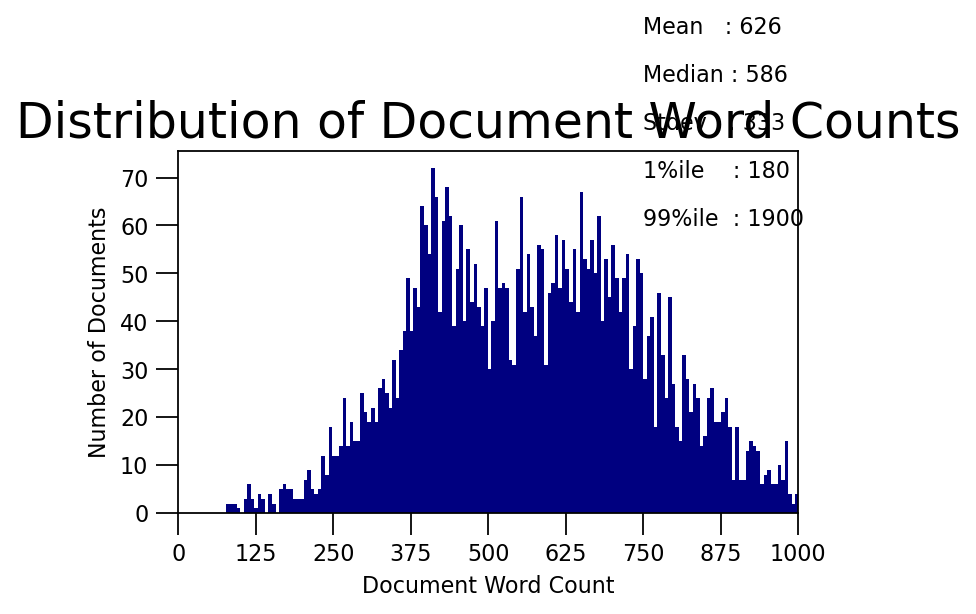

In [24]:
doc_lens = [len(d) for d in df_dominant_topic.Text if type(d)==list]

# Plot
plt.figure(figsize=(5,3), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=10)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))

## Model Evaluations

In [25]:
from gensim.models import CoherenceModel

In [26]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score, the higher the better.
coherence_model_lda = CoherenceModel(model=ldamodel, 
                                     texts=all_tokens_list, 
                                     dictionary=dictionary, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.016028141807418

Coherence Score:  0.4179238914617071


## Visualization of the topic models 


In [27]:
## uncomment the code below if there is no pyLDAvis installed 
#pip install pyLDAvis

In [28]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [29]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
pyLDAvis.save_html(vis, '../figure/first_run.html')   ## save it as a html file 
vis   ## show the figure 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.111947  0.068882       1        1  37.708206
2      0.016730 -0.113989       2        1  34.643883
1     -0.128677  0.045107       3        1  27.647911, topic_info=         Term          Freq         Total Category  logprob  loglift
229       tax   9268.000000   9268.000000  Default  30.0000  30.0000
221     stock   7154.000000   7154.000000  Default  29.0000  29.0000
23       bond   5299.000000   5299.000000  Default  28.0000  28.0000
510     china   8228.000000   8228.000000  Default  27.0000  27.0000
98        fed  12985.000000  12985.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
501      busi   1344.235056   5349.133519   Topic3  -6.2695  -0.0955
164     offic   1209.863445   3177.298583   Topic3  -6.3748   0.3201
950   billion   1313.744095   6184.465207   Topic3  -6.2925  -0.2635
268    accord   1201.320831   3662.373137   Topic3  -6.3819   0.1709
1204    group   1191.900026   3455.136310   Topic3  -6.3898   0.2213

[279 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
268        1  0.342947       accord
268        2  0.329022       accord
268        3  0.327929       accord
10096      2  0.994308  afford_care
2434       1  0.025220       airlin
...      ...       ...          ...
6579       1  0.969485          yen
6579       3  0.030028          yen
267        1  0.940520        yield
267        2  0.030602        yield
267        3  0.029167        yield

[538 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

## Topic intensity over time

In [30]:
## in the main dataset, we add columns sized of nb of topics, recording the score of each topic of that article 

for nb in range(nb_topics):
    
    ## for a particular topic 
    weight_dict = {}
    
    for i in range(len(article_data)):
        if i in id_map.keys():
            this_id = id_map[i]  ## id_map maps id in the dataset and in the model 
            weight_list = dict(ldamodel[corpus][this_id])
            
            
            if nb in weight_list:
                #article_data['weight_topic'+str(nb)].iloc[i] = weight_list[nb]
                weight_dict[i] = weight_list[nb]
            else:
                #article_data['weight_topic'+str(nb)].iloc[i] = 0.0
                weight_dict[i] = 0.0
                
    # merge this back to main data
    weight_df = pd.DataFrame(list(weight_dict.items()),
                             columns = ['id','weight_topic'+str(nb)])
    weight_df.set_index('id', drop = True, inplace = True)
    article_data = pd.merge(article_data,
                           weight_df,
                           left_index = True,
                           right_index = True,
                           how='outer')

In [31]:
## the columns on the right are newly added 

article_data.head(5)

,author,text,subject,location,company,people,organization,title,doctype,date,weight_topic0,weight_topic1,weight_topic2
0,"Irwin, Neil","American borrowing costs keep plunging, and that is signaling something important: Some of the ...",Unemployment; Economic conditions; Interest rates; Budget deficits,NaN,NaN,NaN,Name: New York Stock Exchange--NYSE; NAICS: 523210; Name: Congressional Budget Office--CBO; NAI...,"Rates Keep Falling, Befuddling the Experts",News,2019-07-05,0.821162,0.000000,0.178624
1,NaN,Raise a glass to the longest economic expansion in modern American history.\nA full decade has ...,Executive compensation; Unemployment; Economic conditions; Recessions; Economic growth; Gross D...,United States--US,NaN,NaN,NaN,Two Cheers for a Lackluster Economy,"Opinions, Editorial",2019-07-03,0.424673,0.000000,0.575090
2,"Smialek, Jeanna","WASHINGTON -- President Trump, who has spent months assailing the Federal Reserve for its inter...",Nominations; Interest rates; Central banks; Federal Reserve monetary policy,United States--US China Japan,NaN,"Trump, Donald J Bullard, James Waller, Christopher Carson, Ben Goodfriend, Marvin Shelton, Judy...","Name: Brookings Institution; NAICS: 541711, 541720; Name: Congress; NAICS: 921120; Name: Univer...",Trump Picks Fed Veteran And Fed Critic for Board,News,2019-07-03,0.173720,0.000000,0.826066
3,"Friedman, Thomas L","Near the close of last Wednesday's Democratic presidential debate, Chuck Todd asked the candida...",Life expectancy; Political parties; Geopolitics; National security; Presidential elections; Int...,United States--US,NaN,NaN,NaN,The Biggest Threat to America Is Us,"Commentary, Opinions",2019-07-03,0.000000,0.300207,0.699515
4,"Sanger, David E",WASHINGTON -- Iran on Monday violated a key provision of the 2015 international accord to restr...,Agreements; Violations; Nuclear fuels; Diplomacy; Sanctions; Nuclear weapons; Uranium; Arms con...,Iran United States--US,NaN,"Trump, Donald J Pompeo, Mike Zarif, Mohammed Javad Netanyahu, Benjamin Rouhani, Hassan",Name: Department of Defense; NAICS: 928110; Name: Israel Defense Forces; NAICS: 928110; Name: E...,Iran Breaches Nuclear Limit Set in '15 Deal,News,2019-07-02,0.000000,0.914411,0.085373


summary stats:
count    4991.000000
mean        0.419644
std         0.380197
min         0.000000
25%         0.000000
50%         0.366506
75%         0.791719
max         0.999761
Name: weight_topic0, dtype: float64
summary stats:
count    4991.000000
mean        0.237457
std         0.329695
min         0.000000
25%         0.000000
50%         0.045882
75%         0.384229
max         0.999942
Name: weight_topic1, dtype: float64
summary stats:
count    4991.000000
mean        0.342538
std         0.362050
min         0.000000
25%         0.000000
50%         0.196119
75%         0.663336
max         0.999897
Name: weight_topic2, dtype: float64


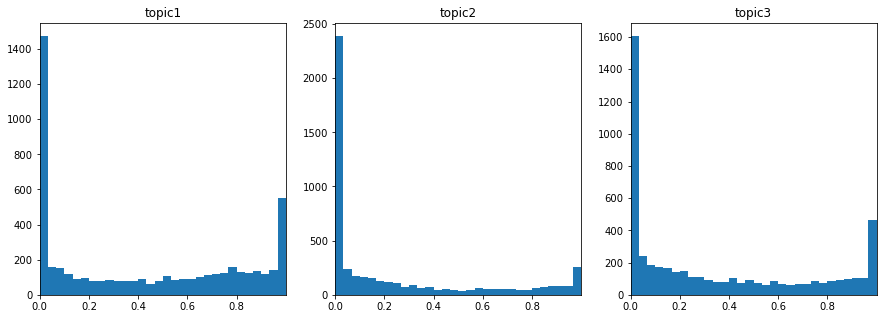

In [32]:
## The distribution of weight of topic across all articles is 

fig,ax = plt.subplots(1,nb_topics,
                      figsize=(15, 5), 
                      facecolor='w', 
                      edgecolor='k')

for nb in range(nb_topics):
    weights = article_data['weight_topic'+str(nb)]
    weight_min = weights.min()
    weight_max = weights.max()

    print('summary stats:')
    print(weights.describe())

    ## distribution 
    ax[nb].set_title('topic'+str(nb+1))
    ax[nb].hist(weights,
                bins=30)
    ax[nb].set_xlim(weight_min,
             weight_max)

In [33]:
## set date 
article_data['date'] = pd.to_datetime(article_data['date'],
                                      errors='coerce')

In [34]:
import datetime as dt 
article_data['month_date'] = pd.to_datetime(article_data['date']).dt.to_period('M')

Text(0.5, 1.0, 'Average Topic Intensity over time (7-day moving average)')

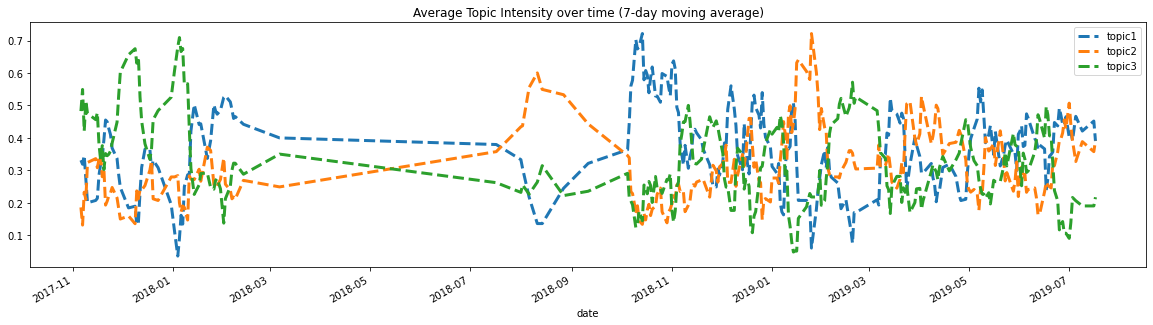

In [35]:
## day by day 
fig = plt.figure(figsize=(20,5))
for nb in range(nb_topics):
    intensity = article_data.groupby(['date'])['weight_topic'+str(nb)].mean()
    intensity_mv = intensity.rolling(7).mean()
    intensity_mv.plot(lw=3,
                   style='--',
                   label='topic'+str(nb+1))
plt.legend(loc=0)
plt.title('Average Topic Intensity over time (7-day moving average)')
## notice in this data, the dates are very sparse, hence daily plot may not be very meaningful 

Text(0.5, 1.0, 'Average Topic Intensity over time (monthly)')

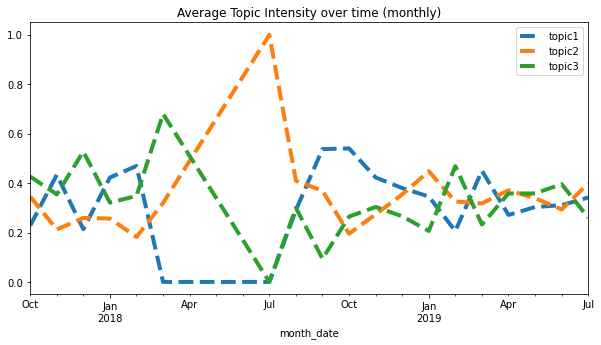

In [36]:
## month by month 

fig = plt.figure(figsize=(10,5))
for nb in range(nb_topics):
    intensity = article_data.groupby(['month_date'])['weight_topic'+str(nb)].mean()
    #intensity = intensity/intensity[0]
    intensity.plot(lw=4,
                   style='--',
                  label='topic'+str(nb+1))
    #plt.plot(intensity,
    #         lw = 2,
    #         label='topic'+str(nb+1))
plt.legend(loc=0)
plt.title('Average Topic Intensity over time (monthly)')